In [89]:
from PIL import Image
import numpy as np
import cv2

(240, 320)


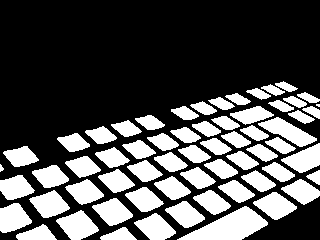

In [195]:
frame = 24

image = Image.open(f"blender/masks/keyboard_{frame:03d}.png").convert("RGB").resize((320, 240))
mask = (np.array(image)[:, :, 0] > 1).astype("uint8")
print(mask.shape)
Image.fromarray(255 * mask)

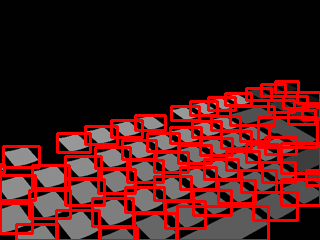

In [196]:
def extract_rects(img):
    return [cv2.boundingRect(c) for c in cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]]


newimg = np.array(image)
for quad in extract_rects(mask):
    x, y, w, h = quad
    cv2.rectangle(newimg, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(newimg)

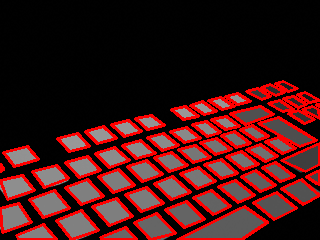

In [197]:
def extract_quads(img):
    qs = []

    for c in cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]:
        e = 0.05 * cv2.arcLength(c, True)

        while len(cv2.approxPolyDP(c, e, True)) < 4:
            e -= 0.01
        while len(q := cv2.approxPolyDP(c, e, True)) > 4:
            e += 0.01

        qs.append(q)

    return qs


newimg = np.array(image)
for quad in extract_quads(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)